In [1]:
## Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. 
## Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

## 1. Problem Statement: 

## a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
## b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [2]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
df= pd.read_csv("weather.csv")

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:

##We cn see Date is object type not data type. We need to work on it.
df['Date']=pd.to_datetime(df['Date'])

df['Day']=df['Date'].apply(lambda x:x.day)


In [6]:

df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
## We can see there are 6120 rows and 33 columns.
df.shape

(8425, 26)

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,2008-01-12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,12,1,2008
1,2008-02-12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,12,2,2008
2,2008-03-12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,12,3,2008
3,2008-04-12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,12,4,2008
4,2008-05-12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [9]:
##Lets remove unwanted  columns.
df.drop('Date',
             axis = 1,
             inplace = True)

In [10]:
## We can see there is no null value i the above data....
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,month,year
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.714777,6.469318,2012.102433
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,8.813446,3.444519,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,8.000000,3.000000,2010.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,16.000000,6.000000,2011.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [12]:
##It seems there is no missing values in df. Lets check null value of each columns.
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
month               0
year                0
dtype: int64

In [13]:
df.shape

(8425, 25)

In [14]:
df["MinTemp"] = df["MinTemp"].fillna(value=df["MinTemp"].mean())
df["MaxTemp"] = df["MaxTemp"].fillna(value=df["MaxTemp"].mean())
df["Rainfall"] = df["Rainfall"].fillna(value=df["Rainfall"].mean())

df["Evaporation"] = df["Evaporation"].fillna(value=df["Evaporation"].mean())
df["Sunshine"] = df["Sunshine"].fillna(value=df["Sunshine"].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df["WindGustSpeed"] = df["WindGustSpeed"].fillna(value=df["WindGustSpeed"].mean())
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(value=df["WindSpeed9am"].mean())
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(value=df["WindSpeed3pm"].mean())
df["Humidity9am"] = df["Humidity9am"].fillna(value=df["Humidity9am"].mean())
df["Humidity3pm"] = df["Humidity3pm"].fillna(value=df["Humidity3pm"].mean())
df["Pressure9am"] = df["Pressure9am"].fillna(value=df["Pressure9am"].mean())
df["Pressure3pm"] = df["Pressure3pm"].fillna(value=df["Pressure3pm"].mean())
df["Cloud9am"] = df["Cloud9am"].fillna(value=df["Cloud9am"].mean())
df["Cloud3pm"] = df["Cloud3pm"].fillna(value=df["Cloud3pm"].mean())
df["Temp9am"] = df["Temp9am"].fillna(value=df["Temp9am"].mean())
df["Temp3pm"] = df["Temp3pm"].fillna(value=df["Temp3pm"].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [15]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
month            0
year             0
dtype: int64

In [16]:

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,month,year
0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,12,1,2008
1,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,12,2,2008
2,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,12,3,2008
3,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,12,4,2008
4,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0,21,6,2017
8421,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0,22,6,2017
8422,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0,23,6,2017
8423,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,24,6,2017


In [17]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("RainTomorrow", axis=1)
y=df['RainTomorrow']

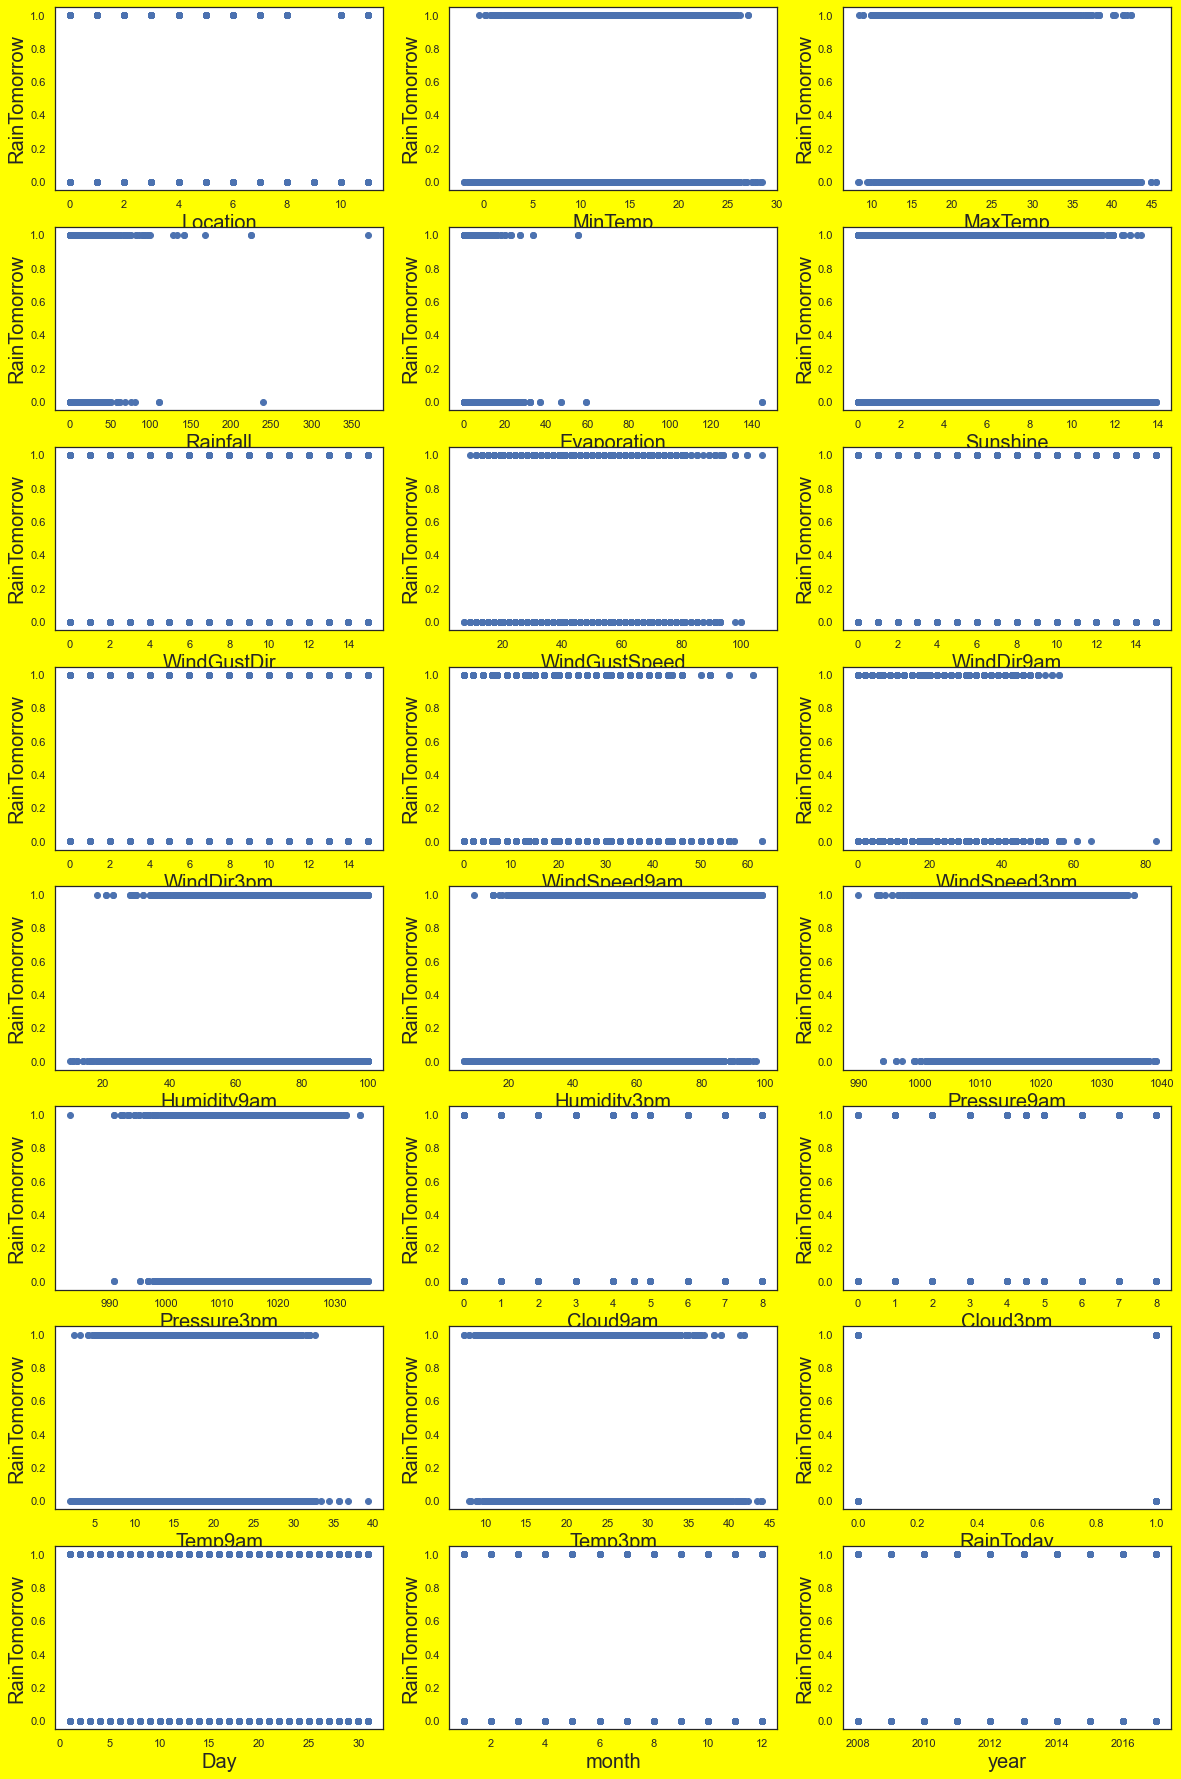

In [18]:
plt.figure(figsize=(20,60),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('RainTomorrow',fontsize=20)
        
        plotnumber+=1
        
plt.show()

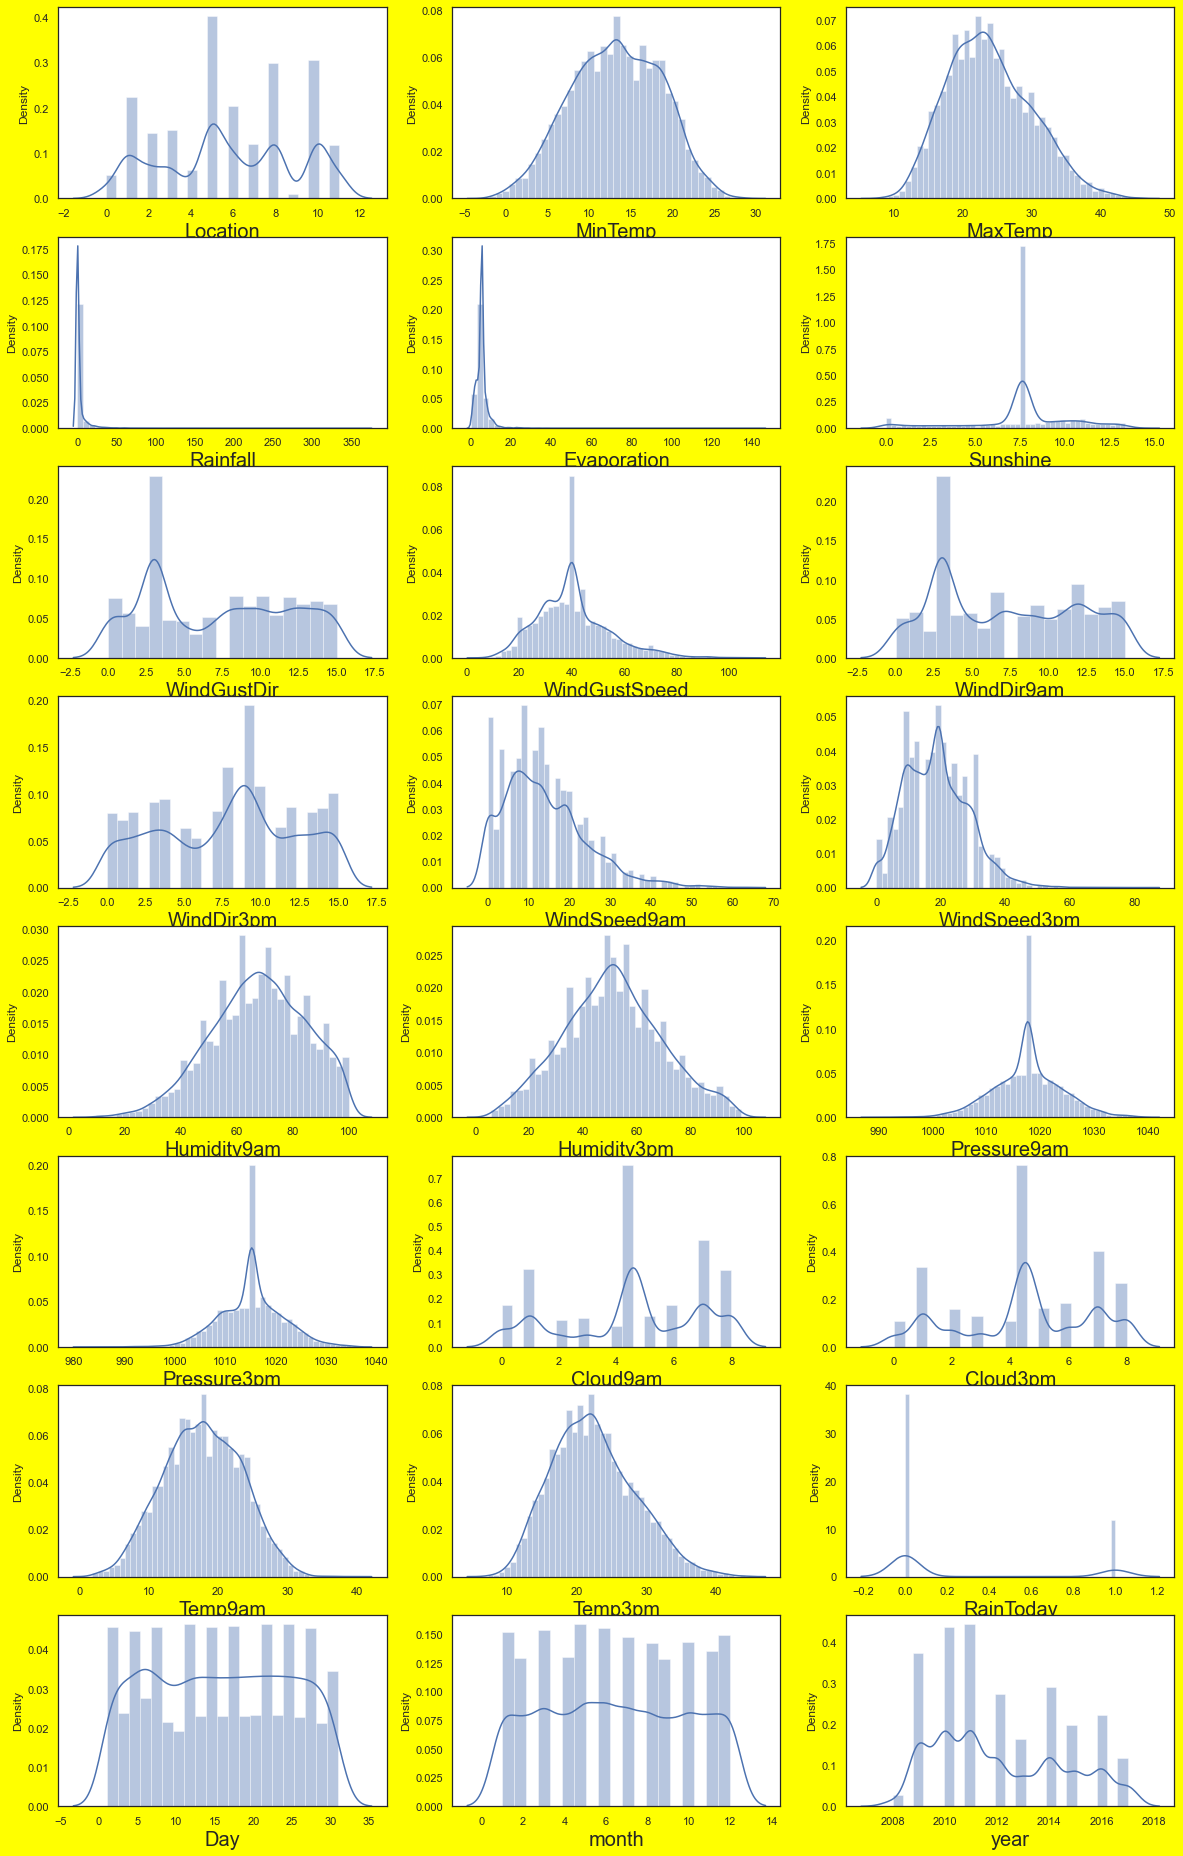

In [19]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [20]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Day               0.004615
month             0.022472
year              0.418663
dtype: float64

In [21]:
df['Rainfall']=np.sqrt(df['Rainfall'])
df['Evaporation']=np.sqrt(df['Evaporation'])
from scipy.stats import skew

In [22]:
## Let Normalize skewed continous data
print(skew(df['Rainfall']))
print(skew(df['Evaporation']))


2.8796049926540506
1.6448850463604687


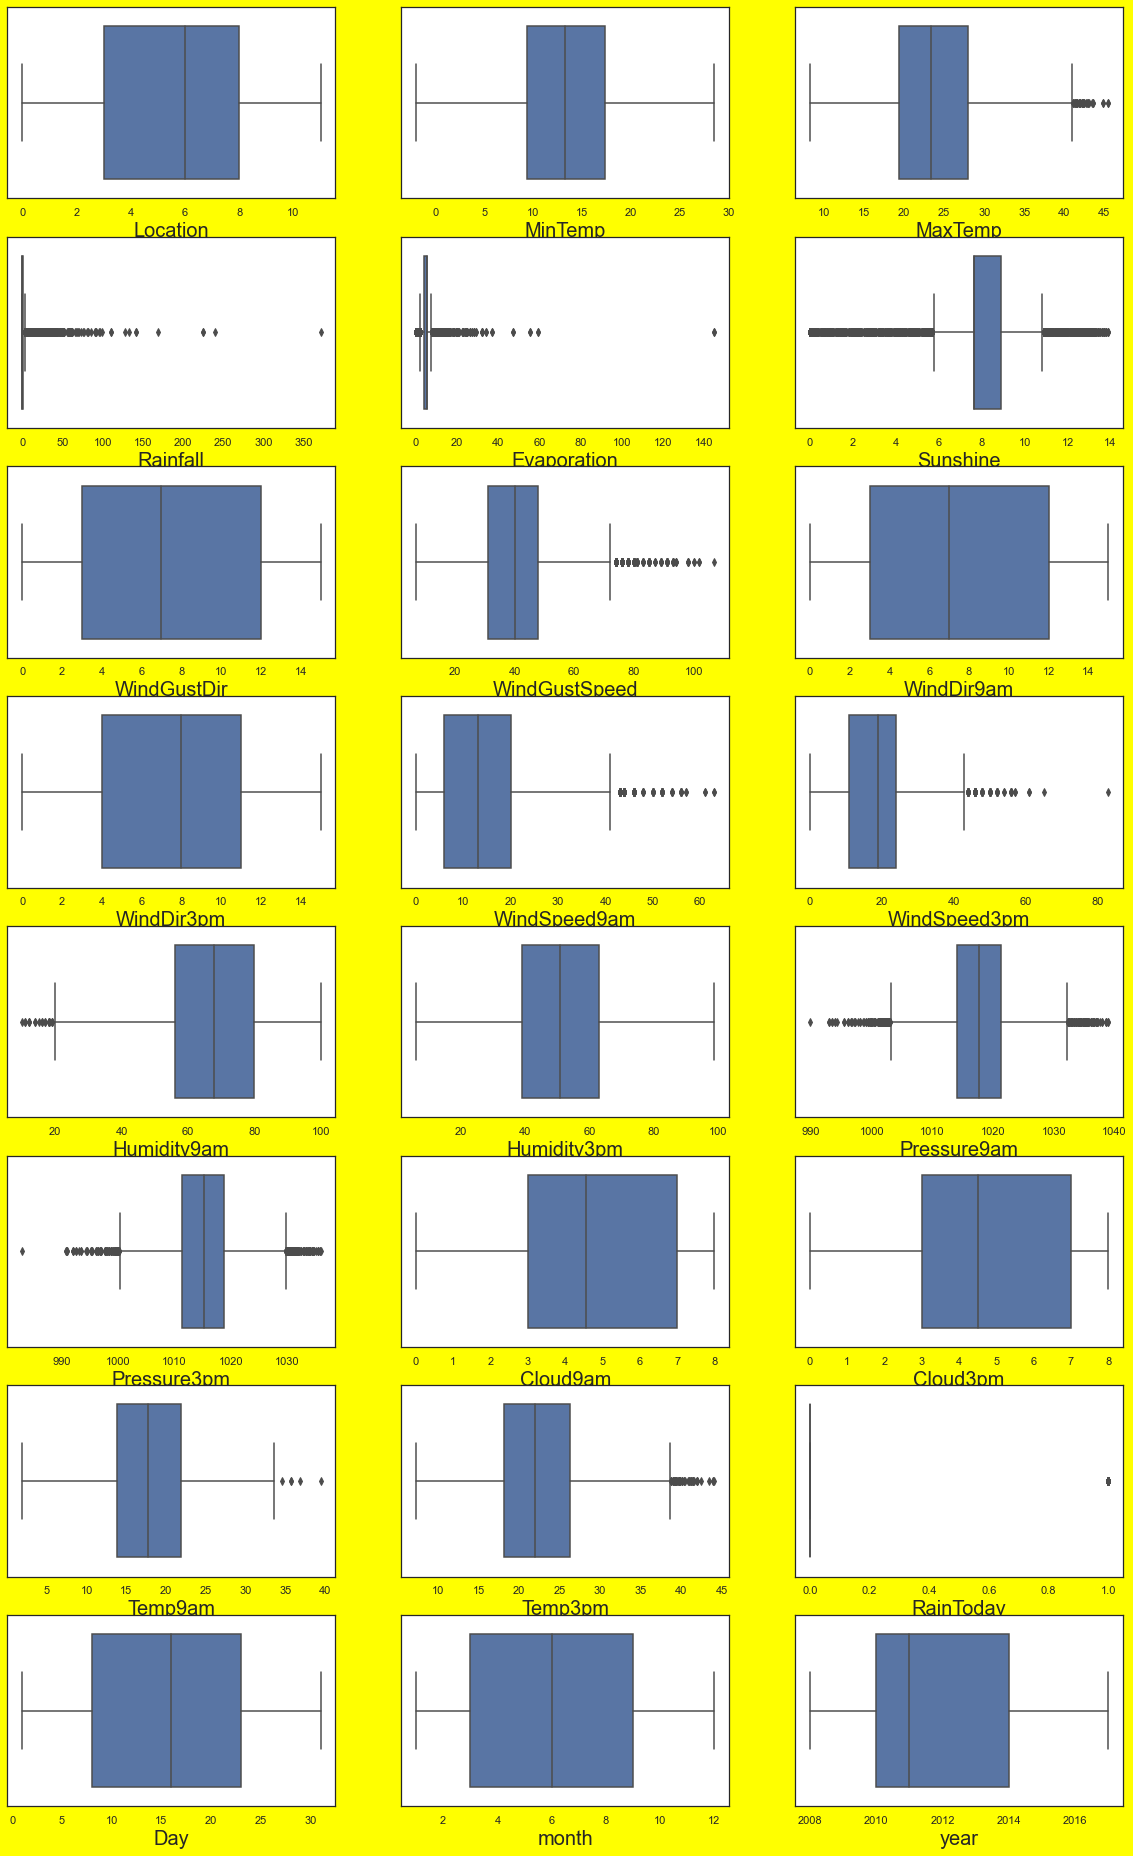

In [23]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [24]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  296,  381,  381,
         405,  406,  407,  407,  431,  462,  544,  563,  568,  568,  569,
         602,  683,  683,  684,  699,  713,  748,  748,  770,  796,  797,
         802,  803,  928,  935,  949,  951,  979,  980,  980,  980, 1008,
        1009, 1011, 1138, 1148, 1149, 1151, 1187, 1189, 1202, 1203, 1237,
        1241, 1264, 1265, 1357, 1358, 1387, 1411, 1412, 1413, 1479, 1480,
        1481, 1501, 1513, 1514, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
        1774, 1782, 1811, 1819, 1873, 1898, 1903, 1945, 1954, 2016, 2028,
        2043, 2063, 2074, 2108, 2116, 2182, 2183, 2186, 2201, 2211, 2219,
        2219, 2230, 2231, 2265, 2429, 2488, 2500, 2505, 2510, 2527, 2527,
        2541, 2593, 2676, 2677, 2735, 2827, 2835, 2849, 2849, 2855, 2859,
        2863, 2869, 2877, 2883, 2886, 2890, 2891, 2897, 2898, 2900, 2901,
        2905, 2909, 2911, 2919, 2925, 

In [25]:
df= df[(z<3).all(axis=1)]
df.shape

(7927, 25)

In [26]:
Data_loss=((8425-7927)/8425)*100

Data_loss

5.910979228486648

In [27]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,5.012347,Location
1,57.544280,MinTemp
2,427.973128,MaxTemp
3,1.411620,Rainfall
4,3.550922,Evaporation
5,15.181245,Sunshine
6,5.289049,WindGustDir
7,22.814213,WindGustSpeed
8,4.697970,WindDir9am
9,6.090374,WindDir3pm


In [29]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [32]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

      Actual  Predicted
4518     0.0        0.0
5964     0.0        0.0
2859     0.0        0.0
7607     0.0        0.0
1018     0.0        0.0

Confussion matrix:
[[1238   76]
 [ 177  194]]


In [33]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.8498516320474777


In [34]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1314
         1.0       0.72      0.52      0.61       371

    accuracy                           0.85      1685
   macro avg       0.80      0.73      0.76      1685
weighted avg       0.84      0.85      0.84      1685



In [35]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

      Actual  Predicted
3862     0.0        0.0
1197     0.0        1.0
2006     0.0        0.0
6839     0.0        0.0
7395     1.0        0.0

Confussion matrix:
[[1262   52]
 [ 129  242]]


In [36]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.8925816023738873


In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

      Actual  Predicted
3862     0.0        0.0
1197     0.0        0.0
2006     0.0        0.0
6839     0.0        1.0
7395     1.0        0.0

Confussion matrix:
[[1265   49]
 [ 232  139]]


In [38]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.8332344213649852


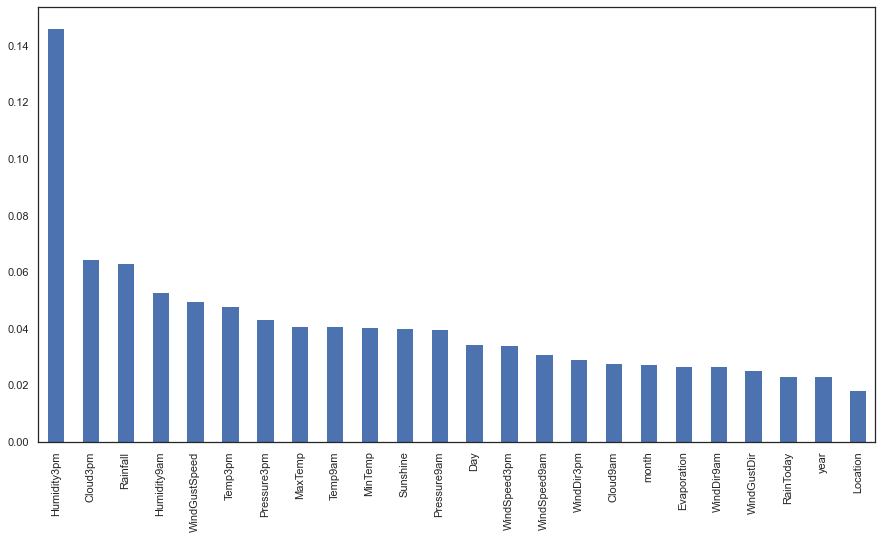

In [39]:

pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [40]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Rainfall", axis=1)
y=df['Rainfall']

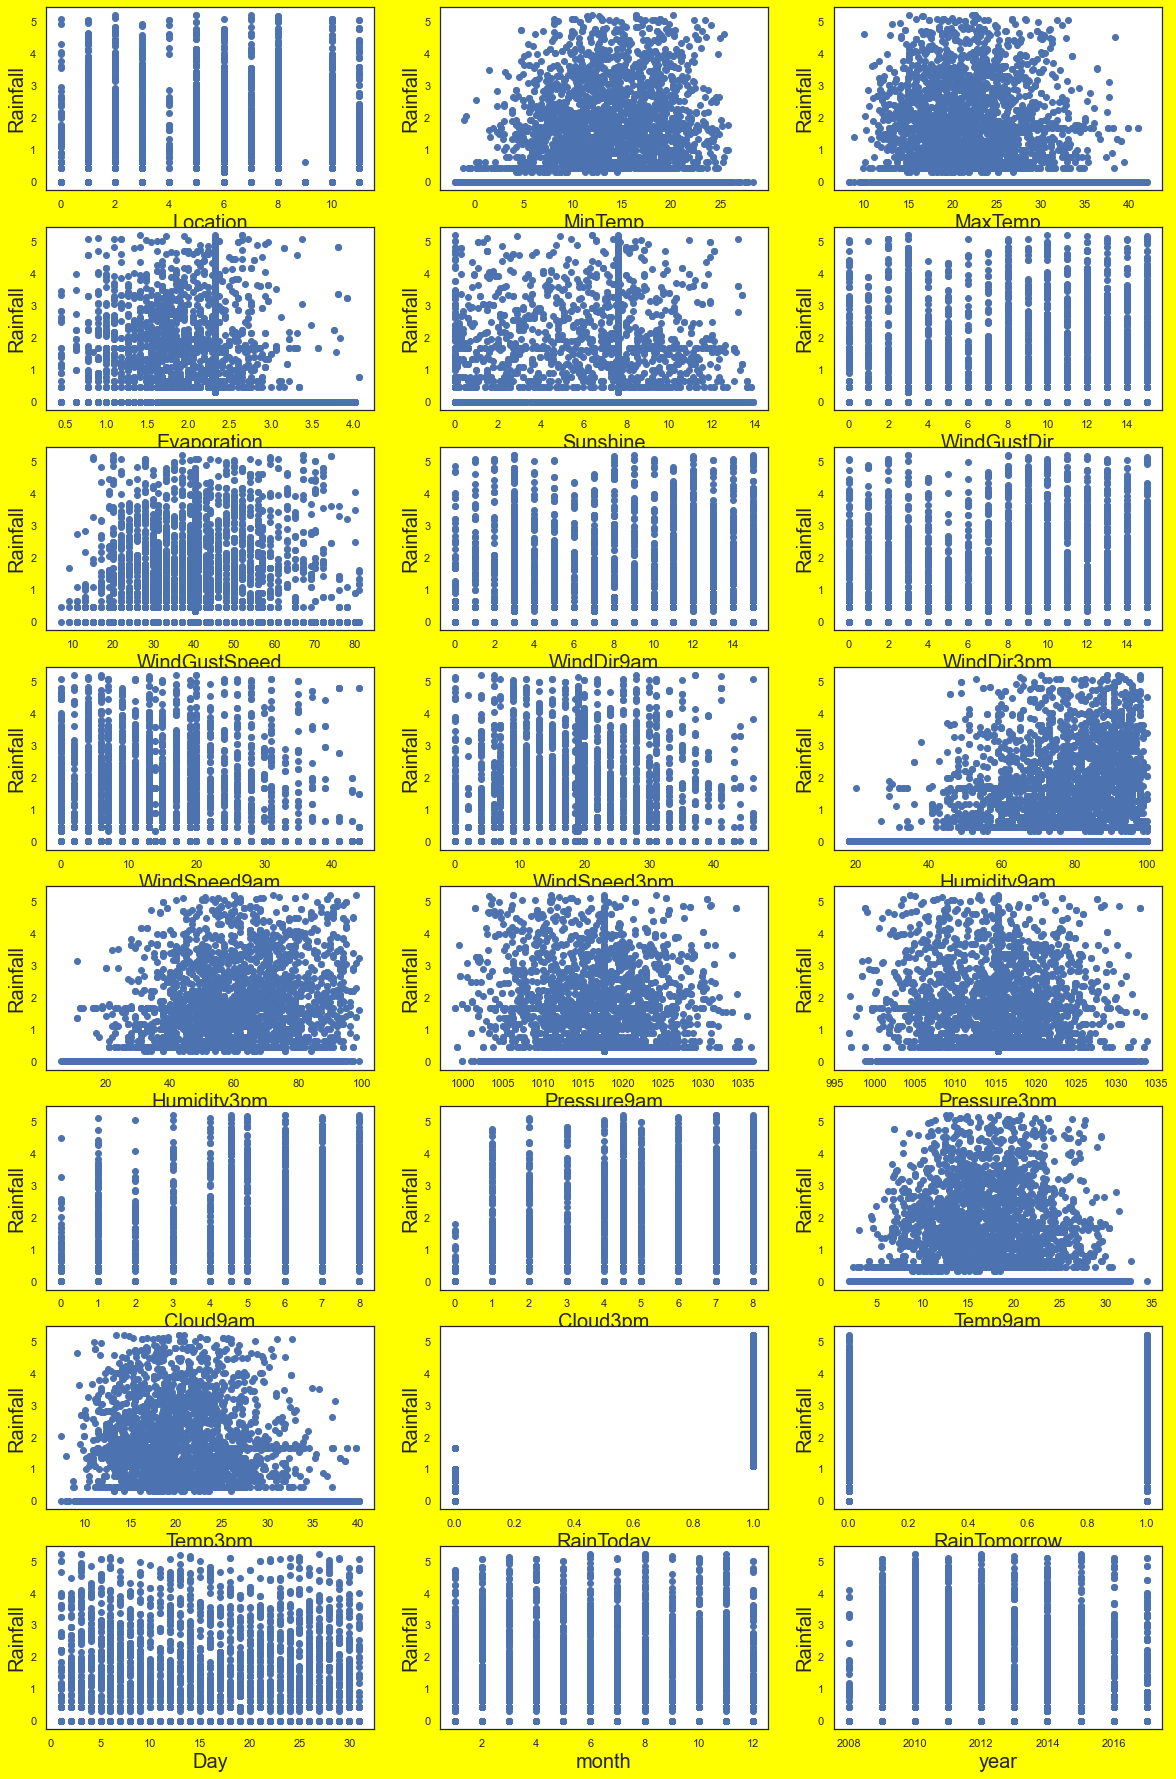

In [41]:
plt.figure(figsize=(20,60),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rainfall',fontsize=20)
        
        plotnumber+=1
        
plt.show()

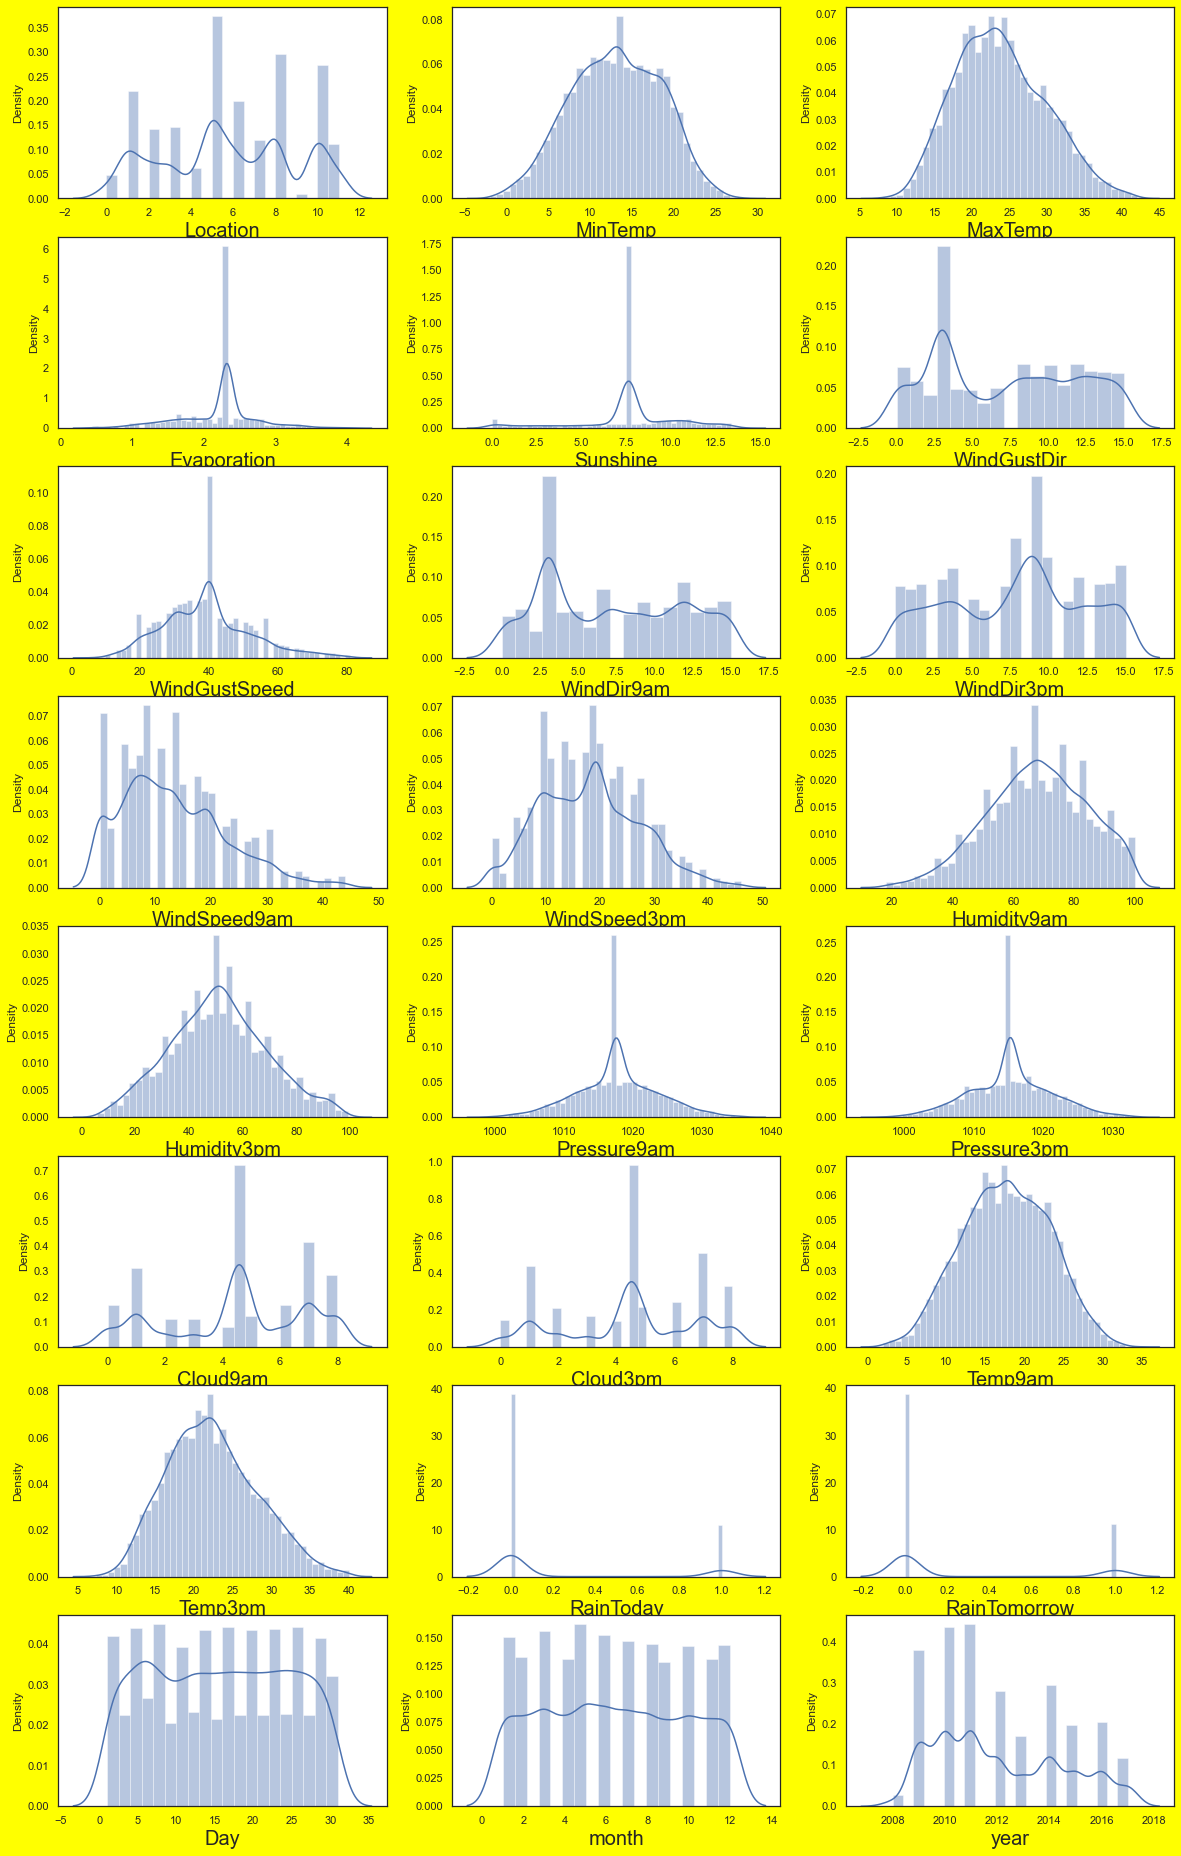

In [42]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=40:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [43]:
df.skew()

Location        -0.042494
MinTemp         -0.081733
MaxTemp          0.314441
Rainfall         1.827163
Evaporation     -0.338116
Sunshine        -0.718646
WindGustDir      0.115072
WindGustSpeed    0.504553
WindDir9am       0.164394
WindDir3pm      -0.123332
WindSpeed9am     0.716288
WindSpeed3pm     0.300908
Humidity9am     -0.229665
Humidity3pm      0.125602
Pressure9am      0.023253
Pressure3pm      0.043630
Cloud9am        -0.353311
Cloud3pm        -0.265421
Temp9am         -0.037446
Temp3pm          0.333534
RainToday        1.337047
RainTomorrow     1.313526
Day              0.007506
month            0.037674
year             0.427212
dtype: float64

In [44]:
df['RainTomorrow']=np.sqrt(df['Rainfall'])
df['RainToday']=np.sqrt(df['RainToday'])

from scipy.stats import skew

In [45]:
## Let Normalize skewed continous data
print(skew(df['RainTomorrow']))
print(skew(df['RainToday']))

1.041438491214048
1.3367939598166365


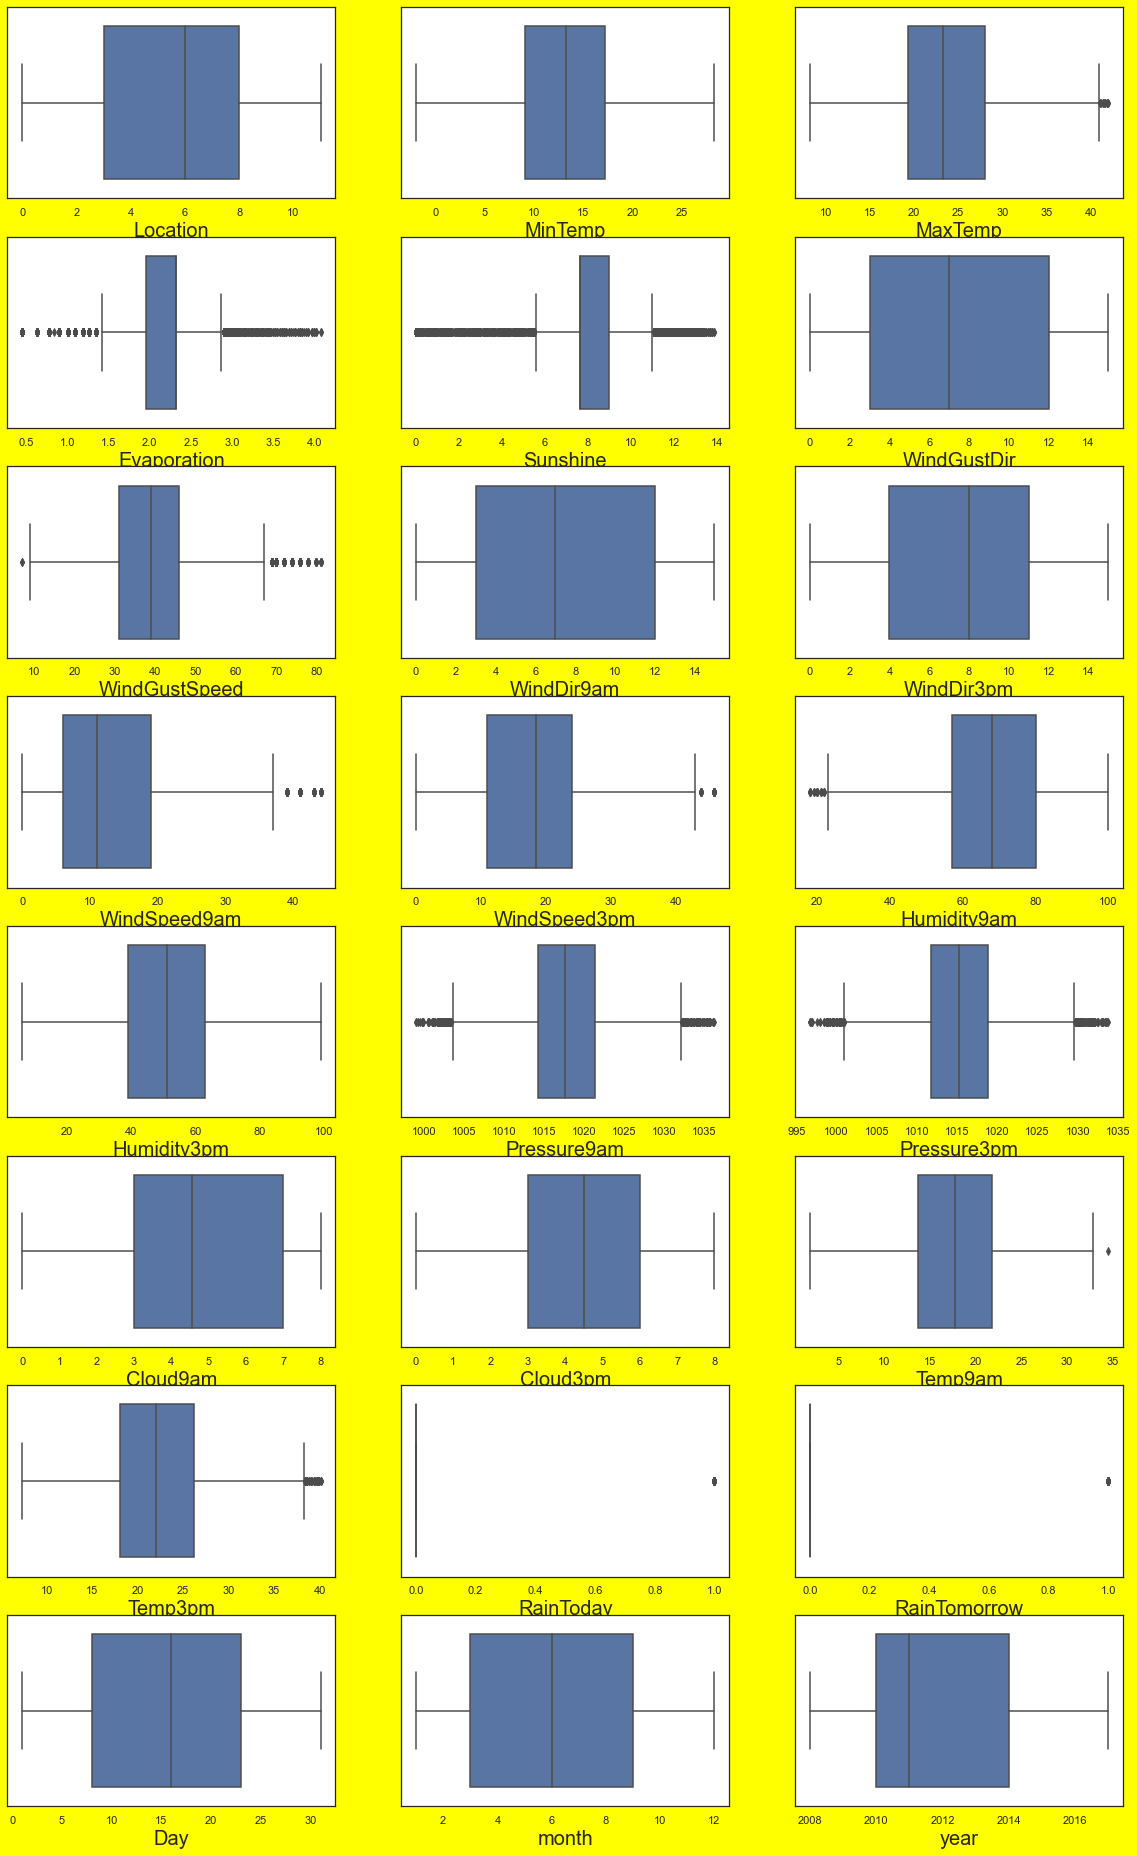

In [46]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [47]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   8,   56,   61,  136,  137,  261,  305,  343,  345,  345,  349,
         444,  449,  449,  493,  548,  569,  581,  587,  620,  621,  626,
         660,  700,  701,  706,  712,  767,  801,  841,  875,  900,  908,
         928,  943, 1111, 1123, 1188, 1222, 1241, 1408, 1425, 1442, 1457,
        1468, 1473, 1474, 1560, 1571, 1574, 1596, 1609, 1620, 1709, 1753,
        1765, 1804, 1868, 1872, 1882, 1930, 1950, 1980, 1983, 1984, 1997,
        2021, 2047, 2075, 2118, 2184, 2205, 2332, 2418, 2425, 2441, 2472,
        2473, 2544, 2554, 2555, 2571, 2694, 2716, 2731, 2768, 2777, 2784,
        2788, 2790, 2871, 2871, 2887, 2887, 2889, 2904, 2907, 2913, 2916,
        2916, 2948, 2950, 2989, 2992, 3013, 3024, 3033, 3090, 3110, 3130,
        3130, 3151, 3163, 3185, 3187, 3239, 3266, 3324, 3328, 3390, 3394,
        3416, 3417, 3425, 3425, 3427, 3433, 3434, 3463, 3470, 3481, 3496,
        3533, 3542, 3549, 3553, 3555, 3636, 3636, 3652, 3652, 3654, 3669,
        3672, 3678, 3681, 3681, 3713, 

In [48]:
df= df[(z<3).all(axis=1)]
df.shape

(7561, 25)

In [49]:
Data_loss=((8425-7561)/8425)*100

Data_loss

10.25519287833828

In [50]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,5.032432,Location
1,58.309582,MinTemp
2,439.179420,MaxTemp
3,28.052191,Evaporation
4,17.049066,Sunshine
5,5.347472,WindGustDir
6,24.961200,WindGustSpeed
7,4.714137,WindDir9am
8,6.107978,WindDir3pm
9,5.998733,WindSpeed9am


In [52]:

#Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.3682559676918506
MSE: 0.33952721712889705
RMSE: 0.5826896404853076


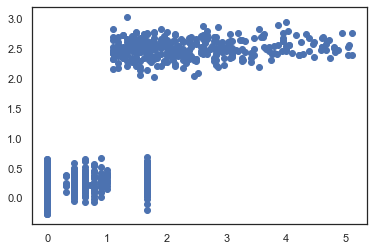

In [55]:
##Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

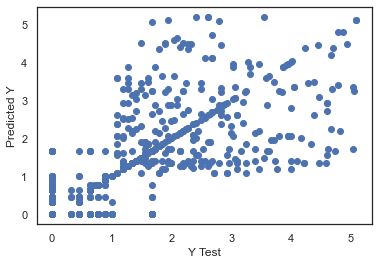

In [57]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

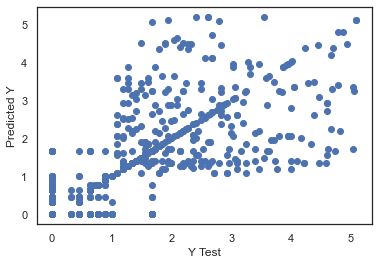

In [58]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
## We can see we got a straight line. so it is better model than LinearRegression. 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.28214982132526484
MSE: 0.42408496907358173
RMSE: 0.651218065684285


In [60]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

,Y Test,Pred
5395,2.863564,3.089201
326,0.000000,0.057594
4663,0.000000,0.000000
1340,0.000000,0.105589
2562,0.000000,0.060335


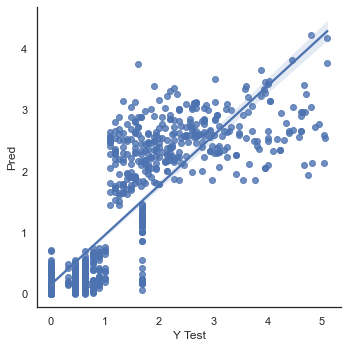

In [61]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2784995865224022
MSE: 0.24093909145947723
RMSE: 0.4908554690124958


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [64]:
from sklearn.metrics import r2_score
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -9.959075502408155e-05
MSE: 1.2690663207891018
MAE: 0.875717844065607
RMSE: 1.1265284376300058


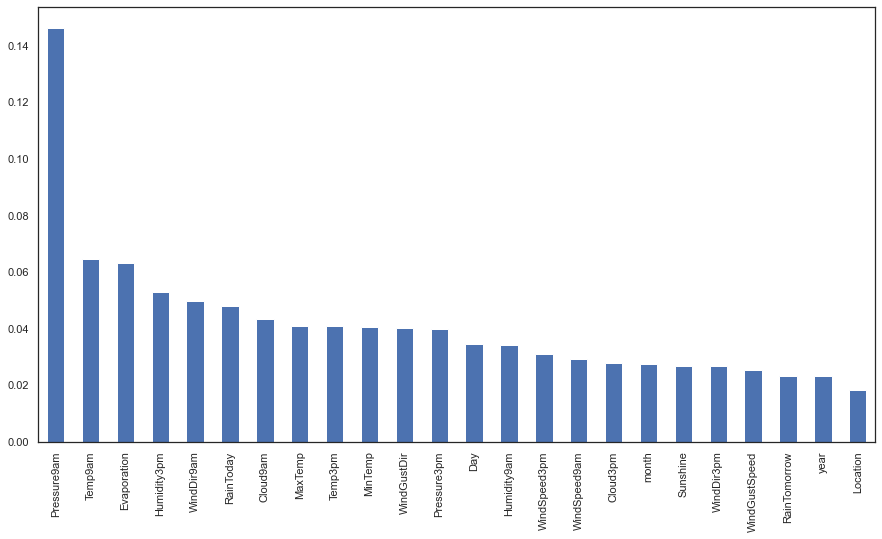

In [65]:
##We can see accuracy score of Random forest is highest.
pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [66]:
## ## Conclusion:

## I have done EDA using Pandas and other plotting libraries.

## Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.

## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.

## I also learnt how to create new features which will in turn help us to better predict the survival.

## I get to know what are the features on which price is highly positively and negatively coorelated with.

## I came to know through analysis which model will be work with better accuracy.

## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 

## In this project I have worked to achieve two model. One for Rain predictio for tommorow and another for predicting Rainfall amount.

## To acieve this model I have first taken 'RainTomorrow' as my target variable and then taken 'Rainfall' as target variable and applied various algorithm to achieve the best model.
## For our both required model Random forest is the most accurate model as per my analysis and assumption..
